Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
### Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [328]:
#Use the magic symbol % to specify some non-python code
%matplotlib inline
'''
That line is only for jupyter notbooks, and allows plt figure sto show up in your notebook.
if you are using another editor, you'll use:
  plt.show()
at the end of all your plotting commands to have the figure pop up in another window.
'''

"\nThat line is only for jupyter notbooks, and allows plt figure sto show up in your notebook.\nif you are using another editor, you'll use:\n  plt.show()\nat the end of all your plotting commands to have the figure pop up in another window.\n"

In [0]:
#Specify the 'plot style' we want to use with pandas and matplotlib
plt.style.use('fast')
#fas is actually the default styel, so you don't necessarily have to set it.

In [330]:
#list of other availabe plot styles you can use instead of fast
plt.style.available

['seaborn',
 'ggplot',
 'seaborn-talk',
 'seaborn-ticks',
 'Solarize_Light2',
 'seaborn-deep',
 'seaborn-notebook',
 'seaborn-dark',
 'seaborn-bright',
 'tableau-colorblind10',
 'bmh',
 'seaborn-colorblind',
 'fivethirtyeight',
 'seaborn-paper',
 'seaborn-whitegrid',
 'fast',
 'classic',
 'grayscale',
 'seaborn-darkgrid',
 'seaborn-dark-palette',
 'seaborn-white',
 'seaborn-pastel',
 'seaborn-poster',
 '_classic_test',
 'seaborn-muted',
 'dark_background']

In [0]:
#Part1 The pandas built in visualization tool
#This is good for quick and dirty plots.  Anything more complex and you'll want to use something
#more robust like matplotlib, seaborn, or plotly

In [332]:
#Read in the titanic dataset
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [333]:
#cabin class is a categorical variable
# it can be displayed using either number or string values
df['cabin_class'] = df['Pclass'].map({1:'first', 2:'second', 3:'third'})
df[['cabin_class', 'Pclass']].head()

,cabin_class,Pclass
0,third,3
1,first,1
2,third,3
3,first,1
4,third,3


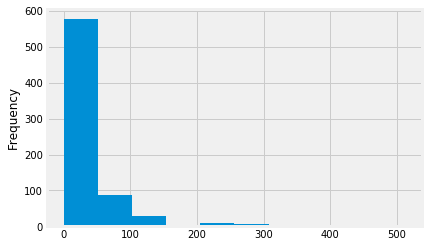

In [334]:
#fare is continuous variable, so we can display it with a histogram
df['Fare'].plot(kind = 'hist')

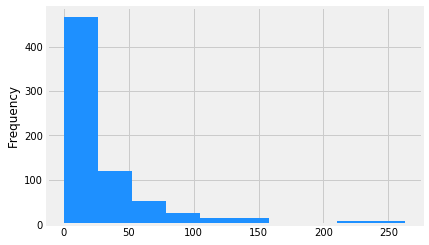

In [335]:
#remove two extreme outliers
df = df[df['Fare'] < 500]
df['Fare'].plot(kind = 'hist', color = 'dodgerblue');

In [0]:
#a continuous variable can be convered to a categorical var using binning.
farebins = [0, 8, 15, 33, 512]
farelabels = ['low', 'med', 'high', 'vhigh']

df['fare_groups'] = pd.cut(df['Fare'], bins = farebins, labels = farelabels)

In [337]:
#lets take a look at it
myresults = df['fare_groups'].value_counts().sort_index()
myresults

low      154
med      189
high     185
vhigh    174
Name: fare_groups, dtype: int64

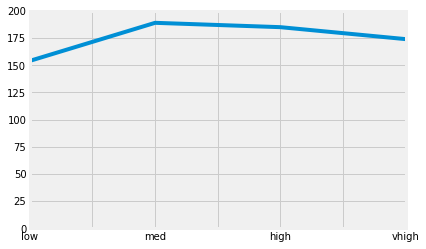

In [338]:
#sometimes its important to specify the range of your y-axis to get more accurate results.
myresults.plot(ylim = (0, 200));

In [339]:
df.shape

(709, 8)

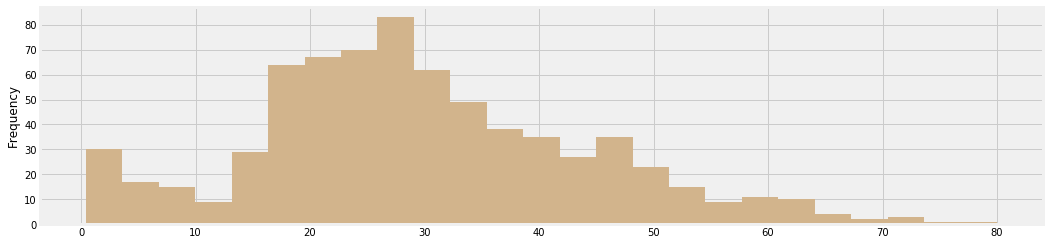

In [340]:
#Histograms
df['Age'].plot(kind = 'hist', bins = 25, figsize = (16,4), color = 'tan');

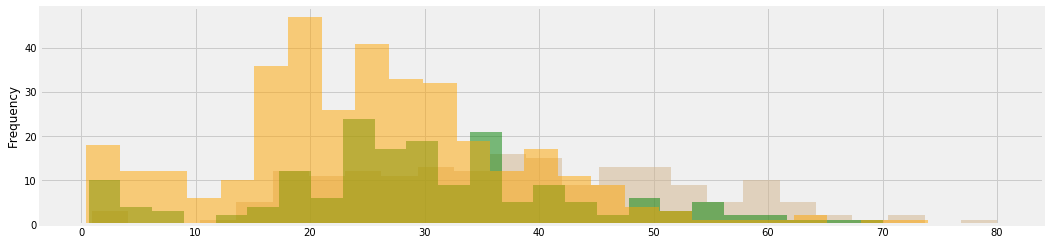

In [341]:
#stacked histogram of continuous variable, broken out by categorical variable
df[df['cabin_class'] == 'first'] ['Age'].plot(kind = 'hist', bins = 25, figsize = (16,4), color = 'tan', alpha = .5)
df[df['cabin_class'] == 'second'] ['Age'].plot(kind = 'hist', bins = 25, figsize = (16,4), color = 'green', alpha = .5)
df[df['cabin_class'] == 'third'] ['Age'].plot(kind = 'hist', bins = 25, figsize = (16,4), color = 'orange', alpha = .5);

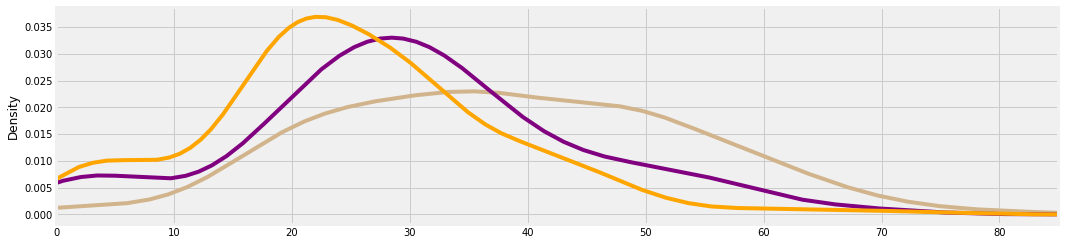

In [342]:
#but this is actually easier to read using a kernel density estime (KDE)
df[df['cabin_class'] == 'first'] ['Age'].plot(kind = 'density', xlim = (0, 85), figsize = (16,4), color = 'tan')
df[df['cabin_class'] == 'second'] ['Age'].plot(kind = 'density', xlim = (0, 85), figsize = (16,4), color = 'purple')
df[df['cabin_class'] == 'third'] ['Age'].plot(kind = 'density', xlim = (0, 85), figsize = (16,4), color = 'orange');

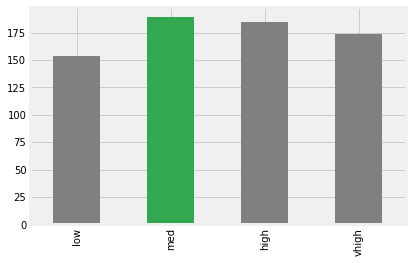

In [343]:
#bar chart. use colors to make a particular value 'pop'
myresults = df['fare_groups'].value_counts().sort_index()
myresults.plot(kind = 'bar', color = ['gray', '#32a852', 'gray', 'gray'])

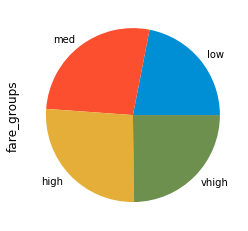

In [344]:
#pie chart
myresults.plot(kind = 'pie');

In [345]:
#compare two categorical variables using crosstab
cab_death = pd.crosstab(df['cabin_class'], df['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


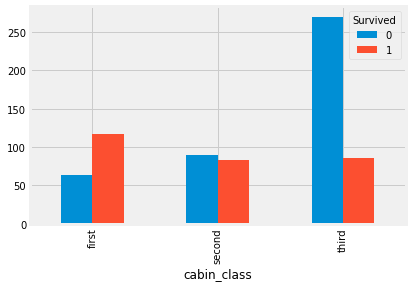

In [346]:
#make that into a bar chart.
cab_death.plot(kind = 'bar');

In [347]:
#crosstab with column percents
cab_death1 = pd.crosstab(df['cabin_class'], df['Survived'], normalize='columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


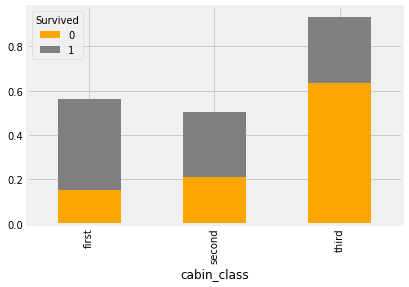

In [348]:
#make a stacked bar chart, for easy comparison of two categorical variables.
cab_death1.plot(kind = 'bar', stacked = True, color = ['orange', 'gray']);

In [349]:
#crosstabe with row percents
cab_death2 = pd.crosstab(df['cabin_class'], df['Survived'], normalize = 'index')
cab_death2

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


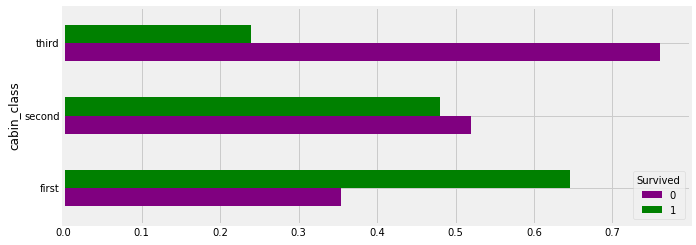

In [350]:
#a paired barchart for comparison of two categorical variables. Note the use of the 'barh'.
cab_death2.plot(kind = 'barh', figsize = (10,4), color = ['purple', 'green'])

In [351]:
#lets look at a single continuous variable
df['Age'].mean()

29.618011283497882

In [352]:
#now explore that continuous variable broken out by categorical variable
cab_age = df.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

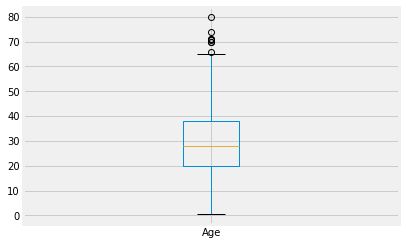

In [353]:
#Box chart!  This is cool, would love to know more about how these are used and what they represent.
##############ask about in 1:1
df['Age'].plot(kind = 'box');

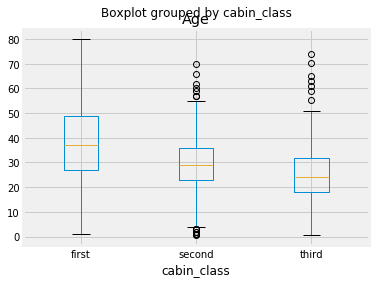

In [354]:
#but to break out a continuous variable by a categorical variable, us 'boxplot'
df.boxplot(column = 'Age', by = 'cabin_class');

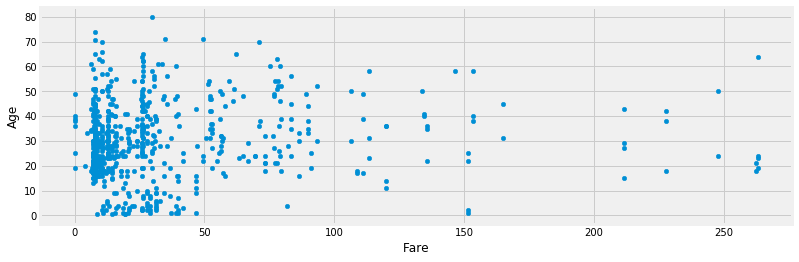

In [355]:
#two continuous variables: age by fare
df.plot(kind = 'scatter', x = 'Fare', y = 'Age', figsize = (12,4));

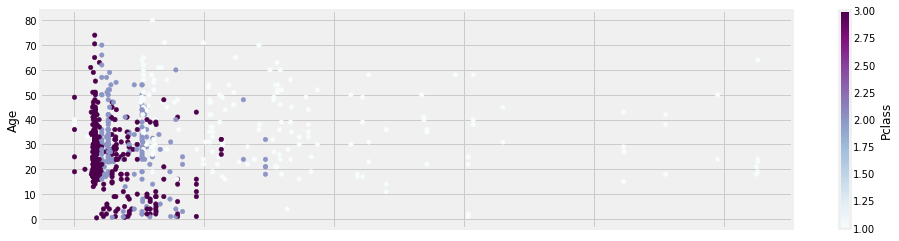

In [356]:
#three variables: age, fare, and cabin class (color can be either continuous or categorical here)
df.plot(kind = 'scatter', x = 'Fare', y = 'Age', c = 'Pclass', colormap = 'BuPu', figsize = (15, 4));

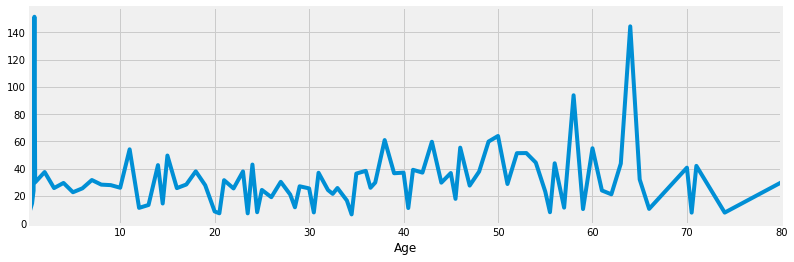

In [357]:
#line chart: age by fare
df.groupby('Age')['Fare'].mean().plot(figsize = (12,4), kind = 'line');

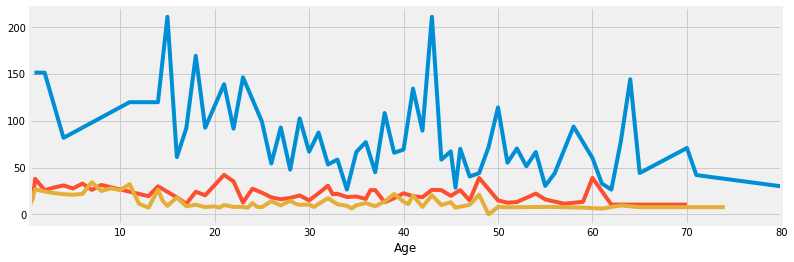

In [358]:
#line char: age by fare and cabin class

#I'm leaving my color to be implicitly chosen.
df[df['cabin_class'] == 'first'].groupby('Age')['Fare'].mean().plot(figsize = (12,4))
df[df['cabin_class'] == 'second'].groupby('Age')['Fare'].mean().plot(figsize = (12,4))
df[df['cabin_class'] == 'third'].groupby('Age')['Fare'].mean().plot(figsize = (12,4));

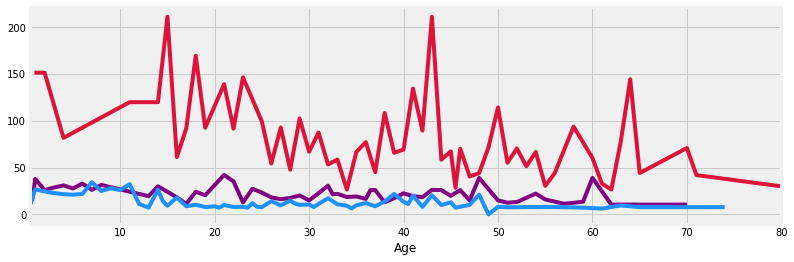

In [359]:
#Lets do the same, with a loop!
mycolors = ['crimson', 'purple', 'dodgerblue']
cab_classes = ['first', 'second', 'third']
#rather than writing it ou three times, I could use a loop.

for x in [0,1,2]:
  df[df['cabin_class'] == cab_classes[x]].groupby('Age')['Fare'].mean().plot(figsize = (12, 4), color = mycolors[x]);

In [360]:
#correlation matrix
corr_matrix = df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


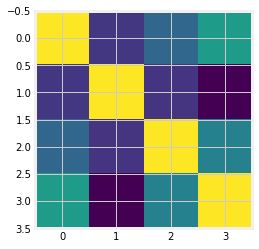

In [361]:
#display the correlation matrix as a heatmap
plt.imshow(corr_matrix)

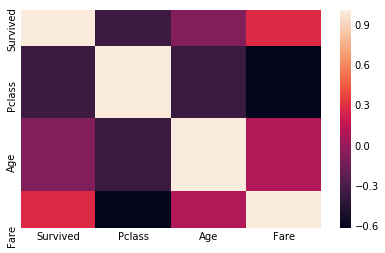

In [362]:
#Do it in seaborn
sns.heatmap(corr_matrix);

In [0]:
x = np.linspace(0, 5, 11)
y = x**2

In [364]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [365]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

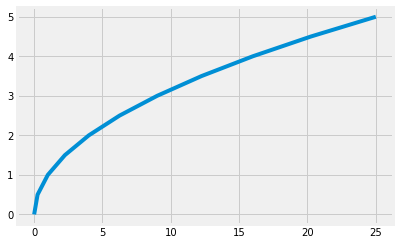

In [366]:
#a very simple plot, to get started. notice that no pandas is required
plt.plot(y, x);

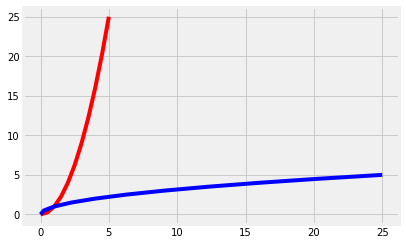

In [367]:
#you can have two plt plots together (and lets add some color).
plt.plot(x, y, 'r')
plt.plot(y, x, 'b');

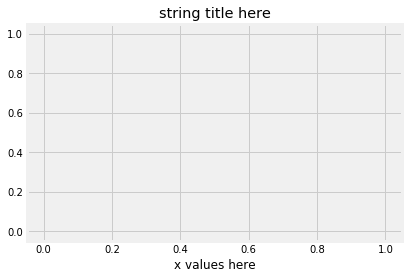

In [368]:
#now add some labels, plus a little texture.
plt.plot()
plt.xlabel('x values here')
plt.title('string title here');

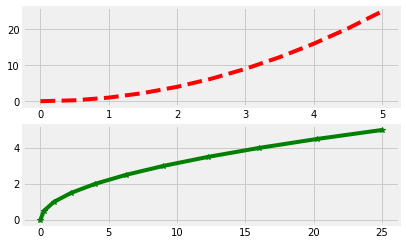

In [369]:
#the basic syntax goes like this: plt.subplot(nrows, ncols, plot_number)
plt.subplot(2, 1, 1)
plt.plot(x, y, 'r--')
plt.subplot(2,1,2)
plt.plot(y,x, 'g*-');

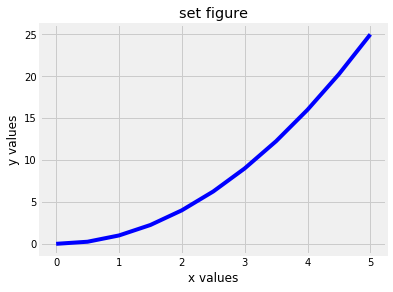

In [370]:
#create figure ( empty canvas)
fig = plt.figure()
#ad seto of axes to figure
axes = fig.add_axes([.1, .1, .8, .8]) # letf, bottom, width, height (range 0 to 1)

#plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('x values')
axes.set_ylabel('y values')
axes.set_title('set figure');
#notice the use of the set_ to begin methods

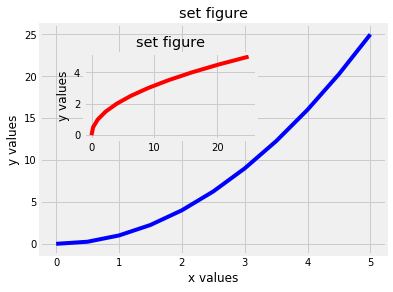

In [371]:
#code is a little more complicated but the advantage is more granularity of control
#create blank canvas
fig = plt.figure()
#add set of axes to figure
axes1 = fig.add_axes([.1, .1, .8, .8])
axes2 = fig.add_axes([.2, .5, .4, .3])

#plot on that set of axes
axes1.plot(x, y, 'b')
axes1.set_xlabel('x values')
axes1.set_ylabel('y values')
axes1.set_title('set figure')

axes2.plot(y, x, 'r')
axes.set_xlabel('x values')
axes2.set_ylabel('y values')
axes2.set_title('set figure');

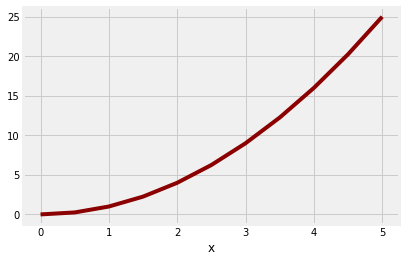

In [372]:
#subplots is liek an automatic axis manager
#use similar to plt.figure() except use tuple unpacking to grab fig and 
fig, axes = plt.subplots(nrows = 1, ncols = 1)
#now use the axes object to add stuff to plot
axes.plot(x, y, 'darkred')
axes.set_xlabel('x');

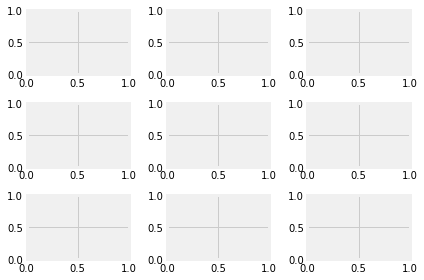

In [373]:
#empty canvas of 1 by 2 subplots
#the parameter labels 'nrows and 'ncols' are ptional
fi, axes = plt.subplots(nrows = 3, ncols = 3)
fig
#mor about '.tight_layout()' below
plt.tight_layout()

In [374]:
#axes ia an array of axes to plot on
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9cbfa0320>,
      dtype=object)

In [0]:
#since this is an array we can iterate through it
#forgot this didn't work in class.  Leaving it for now.
#for a in axes:
#  for ax in a:
#    ax.plort(x, y, 'b')
#    ax.set_xlabel('x vals')
#    ax.set_ylabel('y')
#    ax.set_title('title')

#Display the figure object
#fig

In [376]:
#YOu can set the aspect ration, dpi and figure size when a figure object is created.
fig = plt.figure(figsize = (8,4), dpi = 100)
fig

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

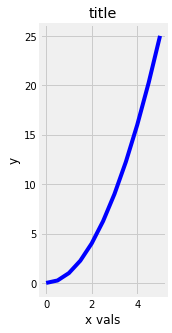

In [377]:
fig, axes = plt.subplots(figsize = (2,5))
axes.plot(x, y, 'b')
axes.set_xlabel('x vals')
axes.set_ylabel('y')
axes.set_title('title');

In [0]:
#save a figure as a png
fig.savefig('myfile.png')

In [0]:
#save a figure as a png and specify the dpi
fig.savefig('myfile1.png', dpi = 200)

In [380]:
axes.set_title('title')

Text(0.5, 1, 'title')

In [381]:
axes.set_xlabel('values')

Text(0.5, 76.16666666666666, 'values')

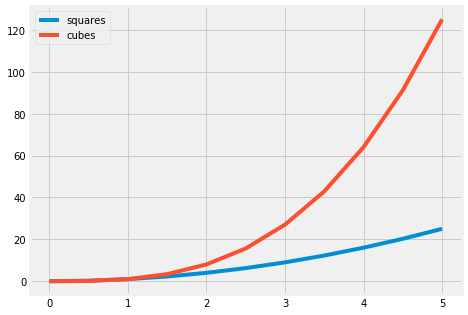

In [382]:
#Legends, you can use the label = 'label text' keyword argument when plots or other objecxts are added t figure
#the legend mehtod without arguments to add the legend to the figure:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x, x**2, label = 'squares')
ax.plot(x, x**3, label = 'cubes')
ax.legend();

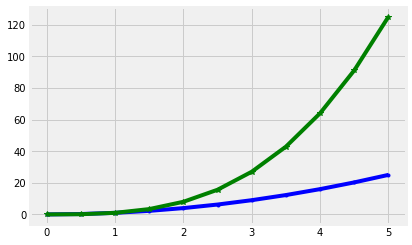

In [383]:
#Colors and line tytpes in matlab
fig, ax = plt.subplots()

#blue line with dots
ax.plot(x, x**2, 'b.-')
#green stared
ax.plot(x, x**3, 'g*-');

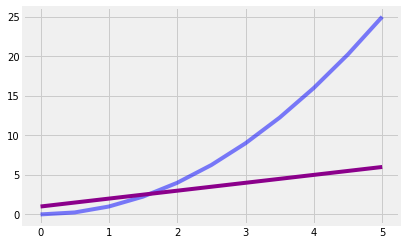

In [384]:
#half-transpartent
fig, ax = plt.subplots()

#blue line with dots
ax.plot(x, x**2, color = 'blue', alpha = .5)

#green dashed line
ax.plot(x, x+1, color = '#8B008B');

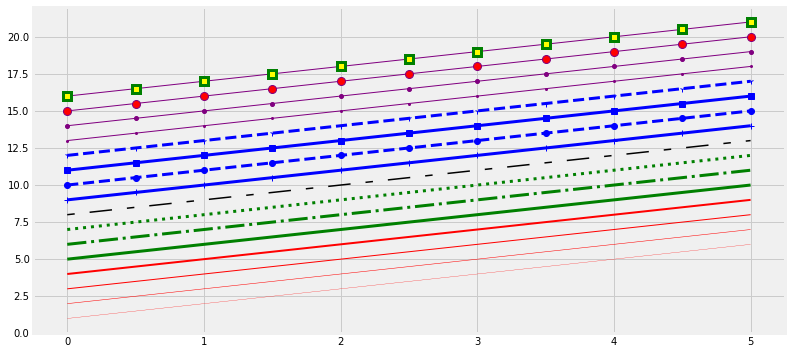

In [385]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

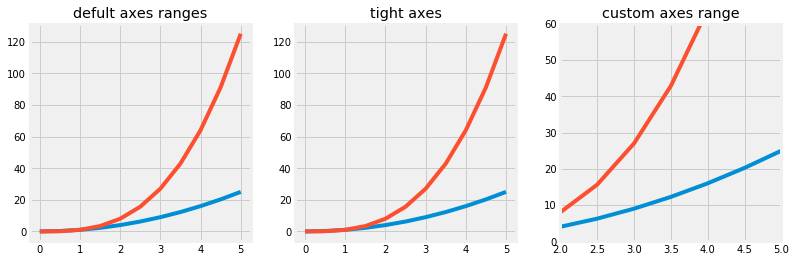

In [386]:
fig, axes = plt.subplots(1, 3, figsize = (12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title('defult axes ranges')

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title('tight axes')

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title('custom axes range');

In [387]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url = url, width = 400)

display(example)

In [388]:
#There is a style for 538
print(plt.style.available[:5])
plt.style.use('fivethirtyeight')

['seaborn', 'ggplot', 'seaborn-talk', 'seaborn-ticks', 'Solarize_Light2']


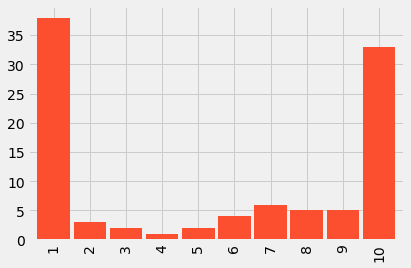

In [389]:
#create fake data to replicate the blog post figure
fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], index = range(1, 11))

fake.plot.bar(color = 'C1', width = 0.9);

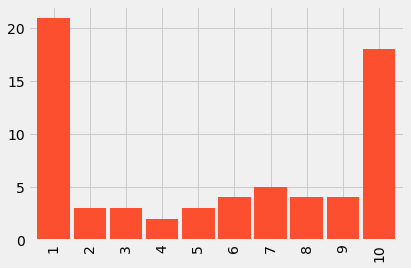

In [390]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2,2,2,
     3,3,3,
     4,4,
     5,5,5,
     6,6,6,6,
     7,7,7,7,7,
     8,8,8,8,
     9,9,9,9,
     10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10])
fake2.value_counts().sort_index().plot.bar(color = 'C1', width = 0.9);

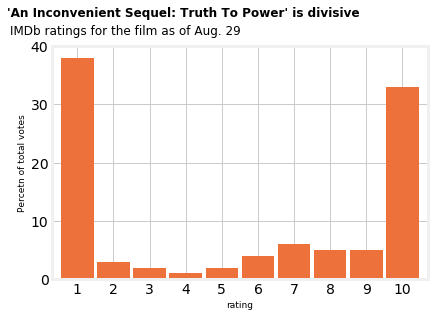

In [391]:
fig, ax = plt.subplots()
fig.patch.set(facecolor = 'white')

#set the bars
fake.plot.bar(width = .9, color = '#ed713a')

ax.set(facecolor = 'white')

#set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize = 12, x = .35, y = 1.1, fontweight = 'bold')
ax.text(s = 'IMDb ratings for the film as of Aug. 29', fontsize = 12, x = -1.85, y = 42);

#set the x and y axes labels
ax.set_xlabel("rating", fontsize = 9)
ax.set_ylabel('Percetn of total votes', fontsize = 9)

#fix the x and y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation = 0)
ax.set_yticklabels(range(0, 50, 10))
ax.set_yticks(range(0, 50, 10));

In [392]:
display(example)

In [0]:
#get the data from the github repo
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [0]:
#conver timestamps strings to actual datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [0]:
#use the timestamp as the unique index identifier
#so that we can select fows by timestamp
df.set_index('timestamp', inplace = True)

In [0]:
#grab only the fows corresponding to the last day
lastday = df['2017-8-29']

In [397]:
#get the demographic breakdowns for all IMDb users on the last day
lastday_filtered = lastday[lastday['category'] == 'IMDb users']
lastday_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [398]:
#just grab the very last line (latest timestamp) of imdb user ratings
#this should be the most up to date data form the dataset
final = lastday_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [399]:
#grab onl the percentag ecolumns since we don't care about the raw
#counts in making our graph
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [400]:
#reset the index so that its numeric again
#and rename the percent column for easy acces in our plotting
plot_data = final[pct_columns].T
plot_data.index = range(1, 11)
plot_data.columns = ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


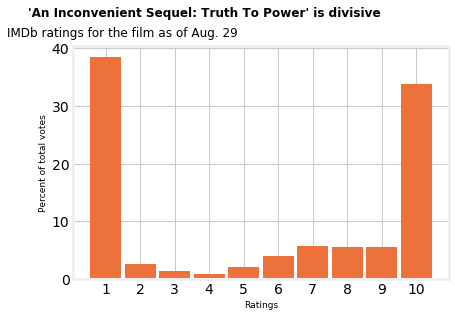

In [401]:
fig, ax = plt.subplots()

#figure background color
fig.patch.set(facecolor = 'white')

#set the bars
ax.bar(x = range(1, 11), height = plot_data['percent'], width = 0.9, color = '#ed713a')

#axes background color
ax.set(facecolor = 'white')

#set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive",
             fontsize = 12, x = .35, y = 1.1, fontweight = 'bold')
ax.text(s = 'IMDb ratings for the film as of Aug. 29', fontsize = 12, x = -1.85, y = 42)

#set the x and y axes labels
ax.set_xlabel('Ratings', fontsize = 9)
ax.set_ylabel('Percent of total votes', fontsize = 9)

#fix the x and y axis tick marks and grid
ax.set_xticklabels(range(1, 11), rotation = 0)
ax.set_xticks(range(1, 11))
ax.set_yticklabels(range(0, 50, 10))
ax.set_yticks(range(0, 50, 10));

In [402]:
#Going to take a stab at reproducing this happy little graph:
#https://fivethirtyeight.com/features/a-statistical-analysis-of-the-work-of-bob-ross/

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/bob-ross/elements-by-episode.csv'

#happy little dataframes
happy_df = pd.read_csv(url)
print(happy_df.shape)
happy_df.head()

(403, 69)


,EPISODE,TITLE,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,CABIN,CACTUS,CIRCLE_FRAME,CIRRUS,CLIFF,CLOUDS,CONIFER,CUMULUS,DECIDUOUS,DIANE_ANDRE,DOCK,DOUBLE_OVAL_FRAME,FARM,FENCE,FIRE,FLORIDA_FRAME,FLOWERS,FOG,FRAMED,GRASS,GUEST,HALF_CIRCLE_FRAME,HALF_OVAL_FRAME,HILLS,LAKE,LAKES,LIGHTHOUSE,MILL,MOON,MOUNTAIN,MOUNTAINS,NIGHT,OCEAN,OVAL_FRAME,PALM_TREES,PATH,PERSON,PORTRAIT,RECTANGLE_3D_FRAME,RECTANGULAR_FRAME,RIVER,ROCKS,SEASHELL_FRAME,SNOW,SNOWY_MOUNTAIN,SPLIT_FRAME,STEVE_ROSS,STRUCTURE,SUN,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
0,S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0
2,S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0
3,S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [403]:
#alright first step is to remove the rows that have STEVE_ROSS and GUEST.  We are simply analyzing bob ross only.
happy_clean_df = happy_df[(happy_df['STEVE_ROSS'] == 0) & (happy_df['GUEST'] == 0)]
print(happy_clean_df.shape)
happy_clean_df.head()

(381, 69)


,EPISODE,TITLE,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,CABIN,CACTUS,CIRCLE_FRAME,CIRRUS,CLIFF,CLOUDS,CONIFER,CUMULUS,DECIDUOUS,DIANE_ANDRE,DOCK,DOUBLE_OVAL_FRAME,FARM,FENCE,FIRE,FLORIDA_FRAME,FLOWERS,FOG,FRAMED,GRASS,GUEST,HALF_CIRCLE_FRAME,HALF_OVAL_FRAME,HILLS,LAKE,LAKES,LIGHTHOUSE,MILL,MOON,MOUNTAIN,MOUNTAINS,NIGHT,OCEAN,OVAL_FRAME,PALM_TREES,PATH,PERSON,PORTRAIT,RECTANGLE_3D_FRAME,RECTANGULAR_FRAME,RIVER,ROCKS,SEASHELL_FRAME,SNOW,SNOWY_MOUNTAIN,SPLIT_FRAME,STEVE_ROSS,STRUCTURE,SUN,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
0,S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0
2,S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0
3,S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [404]:
#okay now lets get rid of all the columns we don't want. Episode, title, Steve ross, and guest are all
#columns we don't want showing up in our graph
happy_clean_df = happy_clean_df.drop(['EPISODE', 'TITLE', 'STEVE_ROSS', 'GUEST'], 1)
print(happy_clean_df.shape)
happy_clean_df.head()

(381, 65)


,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,CABIN,CACTUS,CIRCLE_FRAME,CIRRUS,CLIFF,CLOUDS,CONIFER,CUMULUS,DECIDUOUS,DIANE_ANDRE,DOCK,DOUBLE_OVAL_FRAME,FARM,FENCE,FIRE,FLORIDA_FRAME,FLOWERS,FOG,FRAMED,GRASS,HALF_CIRCLE_FRAME,HALF_OVAL_FRAME,HILLS,LAKE,LAKES,LIGHTHOUSE,MILL,MOON,MOUNTAIN,MOUNTAINS,NIGHT,OCEAN,OVAL_FRAME,PALM_TREES,PATH,PERSON,PORTRAIT,RECTANGLE_3D_FRAME,RECTANGULAR_FRAME,RIVER,ROCKS,SEASHELL_FRAME,SNOW,SNOWY_MOUNTAIN,SPLIT_FRAME,STRUCTURE,SUN,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [405]:
#okay I think I can do this in one fell swoop.  We have to sum the columns, sort the values descending, normalized,
#over the top 32 rows (as per the graph).  We have 65 rows 65 -32 = 33. So well drop 33 from the bottom
happy_clean_df.sum()[:-33].sort_values(ascending = False)

DECIDUOUS            215
CONIFER              201
CLOUDS               167
GRASS                137
LAKE                 131
BUSHES               116
CUMULUS               80
CABIN                 68
FRAMED                50
BEACH                 27
CIRRUS                25
FENCE                 24
FOG                   23
BARN                  17
HILLS                 15
FLOWERS                8
CLIFF                  8
BRIDGE                 7
CACTUS                 4
BOAT                   2
AURORA_BOREALIS        2
HALF_CIRCLE_FRAME      1
FLORIDA_FRAME          1
DOCK                   1
CIRCLE_FRAME           1
DOUBLE_OVAL_FRAME      1
HALF_OVAL_FRAME        1
BUILDING               1
FARM                   1
FIRE                   1
APPLE_FRAME            1
DIANE_ANDRE            0
dtype: int64

In [0]:
#ah, there are no mistakes, just happy accidents. looks like I did my indexing wrong
#I think I need to drop after sorting and keep a few more lines, and I just straight up counted
#the original graph wrong.  I want 36 remaining rows, not 32
happy_clean_df = happy_clean_df.sum().sort_values(ascending = False)[:-29]

In [407]:
#okay the order doesn't look exactly right with the original graph.  That is concerning.  I removed rows with Steve_Ross and Guest
#maybe I was meant to keep the rest of the data from those.  But wouldn't that skew our normalizing?  I guess I can give it a shot
#and find out why flowers are above plam_trees in the original graph. what a rabit hole
test = happy_df.drop(['EPISODE', 'TITLE', 'STEVE_ROSS', 'GUEST'], 1)
print(test.shape)
test.head()

(403, 65)


,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,CABIN,CACTUS,CIRCLE_FRAME,CIRRUS,CLIFF,CLOUDS,CONIFER,CUMULUS,DECIDUOUS,DIANE_ANDRE,DOCK,DOUBLE_OVAL_FRAME,FARM,FENCE,FIRE,FLORIDA_FRAME,FLOWERS,FOG,FRAMED,GRASS,HALF_CIRCLE_FRAME,HALF_OVAL_FRAME,HILLS,LAKE,LAKES,LIGHTHOUSE,MILL,MOON,MOUNTAIN,MOUNTAINS,NIGHT,OCEAN,OVAL_FRAME,PALM_TREES,PATH,PERSON,PORTRAIT,RECTANGLE_3D_FRAME,RECTANGULAR_FRAME,RIVER,ROCKS,SEASHELL_FRAME,SNOW,SNOWY_MOUNTAIN,SPLIT_FRAME,STRUCTURE,SUN,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [408]:
test.sum().sort_values(ascending = False)[:-29]

TREE              361
TREES             337
DECIDUOUS         227
CONIFER           212
CLOUDS            179
MOUNTAIN          160
LAKE              143
GRASS             142
RIVER             126
BUSHES            120
SNOWY_MOUNTAIN    109
MOUNTAINS          99
CUMULUS            86
STRUCTURE          85
ROCKS              77
SNOW               75
CABIN              69
WINTER             69
FRAMED             53
PATH               49
SUN                40
WATERFALL          39
OVAL_FRAME         38
OCEAN              36
WAVES              34
CIRRUS             28
BEACH              27
FENCE              24
FOG                23
HILLS              18
BARN               17
FLOWERS            12
NIGHT              11
PALM_TREES          9
CLIFF               8
BRIDGE              7
dtype: int64

In [0]:
#okay that isn't the right order either.  So my next guess is when we normalize, and plot it may change the order. At this point
#i'll take the hit, and assume my process is not exactly like theirs.  I feel better about happy_clean_df, so I'm going to normalize,
denom = 381 #from our original trimming shape.  I probably should have stored it then,but oh well

happy_clean_df = round((happy_clean_df / denom) * 100)


In [0]:
happy_clean_df = happy_clean_df.astype(np.int64)

In [411]:
happy_clean_df

TREE              91
TREES             85
DECIDUOUS         56
CONIFER           53
CLOUDS            44
MOUNTAIN          39
GRASS             36
LAKE              34
RIVER             33
BUSHES            30
SNOWY_MOUNTAIN    26
MOUNTAINS         24
STRUCTURE         22
CUMULUS           21
ROCKS             20
SNOW              19
CABIN             18
WINTER            18
FRAMED            13
PATH              13
SUN               10
WATERFALL         10
OVAL_FRAME         9
OCEAN              9
WAVES              9
BEACH              7
CIRRUS             7
FENCE              6
FOG                6
BARN               4
HILLS              4
NIGHT              3
PALM_TREES         2
FLOWERS            2
CLIFF              2
BRIDGE             2
dtype: int64

In [0]:
#need to switch things around, My df needs to be ascending to plot right so
happy_clean_df.sort_values(ascending = True, inplace = True)

In [413]:
#lets fix those indexes
replace_index = {}
for x in happy_clean_df.index:
  replace_index[x] = x.capitalize().replace('_', ' ')

replace_index['TREE'] = 'At least one tree'
replace_index['TREES'] = 'At least two trees'
print(replace_index)

{'BRIDGE': 'Bridge', 'PALM_TREES': 'Palm trees', 'CLIFF': 'Cliff', 'FLOWERS': 'Flowers', 'NIGHT': 'Night', 'HILLS': 'Hills', 'BARN': 'Barn', 'FOG': 'Fog', 'FENCE': 'Fence', 'BEACH': 'Beach', 'CIRRUS': 'Cirrus', 'WAVES': 'Waves', 'OCEAN': 'Ocean', 'OVAL_FRAME': 'Oval frame', 'WATERFALL': 'Waterfall', 'SUN': 'Sun', 'FRAMED': 'Framed', 'PATH': 'Path', 'WINTER': 'Winter', 'CABIN': 'Cabin', 'SNOW': 'Snow', 'ROCKS': 'Rocks', 'CUMULUS': 'Cumulus', 'STRUCTURE': 'Structure', 'MOUNTAINS': 'Mountains', 'SNOWY_MOUNTAIN': 'Snowy mountain', 'BUSHES': 'Bushes', 'RIVER': 'River', 'LAKE': 'Lake', 'GRASS': 'Grass', 'MOUNTAIN': 'Mountain', 'CLOUDS': 'Clouds', 'CONIFER': 'Conifer', 'DECIDUOUS': 'Deciduous', 'TREES': 'At least two trees', 'TREE': 'At least one tree'}


In [0]:
#now lets replace them
happy_clean_df.rename(index = replace_index, inplace = True)

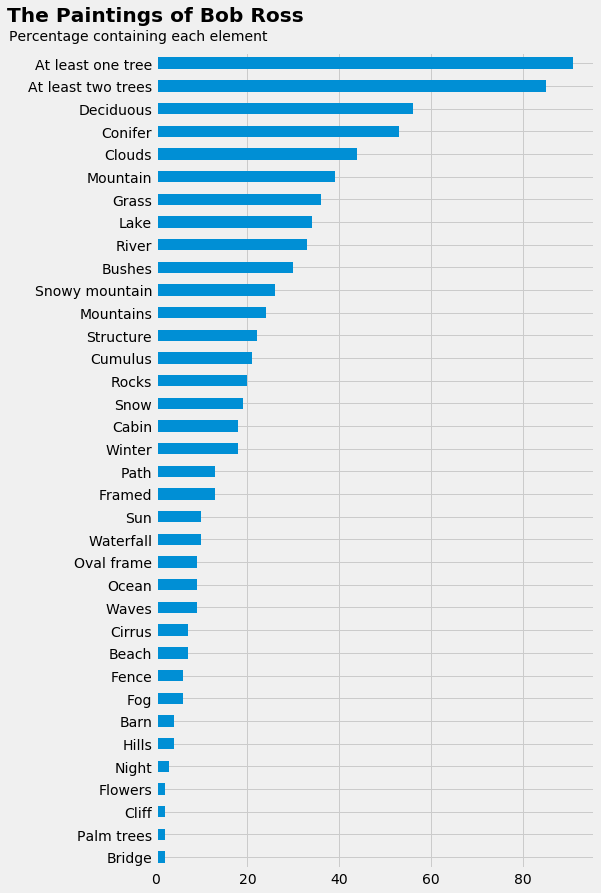

In [415]:
#I'm going to call this good enough.  Holy smokes you can spend some time on just doctoring everything for a graph!
ax = happy_clean_df.plot(kind = 'barh', figsize= (7, 14))

ax.set_title('The Paintings of Bob Ross', x = 0, y = 1.03, fontweight = 'bold')
ax.text(s = 'Percentage containing each element', x= -32, y = 36);

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here